In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
import re

In [6]:
# Spécification du chemin du chromedriver
chrome_driver_path = 'C:\\Users\\lenovo\\3D Objects\\chromedriver-win64\\chromedriver.exe'

# Utilisation d'un objet Service pour le pilote Chrome
chrome_service = ChromeService(chrome_driver_path)

# Création d'une instance du pilote Chrome avec l'objet Service
driver = webdriver.Chrome(service=chrome_service)

# Navigation vers une page web
url = "https://www.facebook.com/Hespress/videos"
driver.get(url)

# Scrolling vers le bas de la page pour charger davantage de contenu
for _ in range(200):
    driver.find_element("tag name",'body').send_keys(Keys.PAGE_DOWN)
    time.sleep(2) 

# Obtention du contenu HTML de la page
html = driver.page_source

# Fermeture du WebDriver à la fin
driver.quit()


In [7]:
# Analyse du HTML avec BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Trouvez le titre de la page
title = soup.find('meta', property='og:title')['content']
print('Titre de la page:', title)

# Trouvez la description de la page
description = soup.find('meta', property='og:description')['content']
print('Description de la page:', description)

Titre de la page: HESPRESS | Rabat 
Description de la page: HESPRESS, Rabat. 17 377 049 J’aime · 373 526 en parlent · 563 personnes étaient ici. ‎أول جريدة إلكترونية في المغرب
الصفحة الرسمية لـ هسبريس
HESPRESS OFFICIAL PAGE
www.hespress.com‎


In [8]:
# Analyse du HTML avec BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Recherche de la div parente contenant plusieurs publications
container_div = soup.find("div", class_="x1qjc9v5 x1lq5wgf xgqcy7u x30kzoy x9jhf4c x78zum5 xdt5ytf x1l90r2v xyamay9 xjl7jj")

# Si la div parente est trouvée, itération sur les divs enfants (publications)
if container_div:
    videos = container_div.find_all("div", class_="x9f619 x1r8uery x1iyjqo2 x6ikm8r x10wlt62 x1n2onr6")


# Liste pour stocker les données
data_list = {'Titre': [], 'Vues': [], 'Date': [], 'Durée': [], 'Likes': [], 'Lien': []}

# ...

# Boucle sur les vidéos extraites
for i, video in enumerate(videos, 1):
    # Extraction des informations
    titre_span = video.find("span", class_="x1lliihq x6ikm8r x10wlt62 x1n2onr6")
    titre = titre_span.text.strip() if titre_span else "non trouvée"
    if titre != "non trouvée":
        data_list['Titre'].append(titre)

    views_span = video.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x4zkp8e x676frb x1nxh6w3 x1sibtaa xo1l8bm x12scifz x1yc453h")
    views_span = views_span.find_next("div") if views_span else None
    views = views_span.text.strip() if views_span else "non trouvée"
    if views != "non trouvée":
        data_list['Vues'].append(views)

    date_span = video.find("span", class_="x4k7w5x x1h91t0o x1h9r5lt x1jfb8zj xv2umb2 x1beo9mf xaigb6o x12ejxvf x3igimt xarpa2k xedcshv x1lytzrv x1t2pt76 x7ja8zs x1qrby5j")
    date = date_span.text.strip() if date_span else "non trouvée"
    if date != "non trouvée":
        data_list['Date'].append(date)

    duree_span = video.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen x1s688f x17z8epw")
    duree = duree_span.text.strip() if duree_span else "non trouvée"
    if duree != "non trouvée":
        data_list['Durée'].append(duree)

    like_span = video.find("span", class_="xt0b8zv xjbqb8w xrbpyxo x1mh8g0r x6ikm8r x10wlt62 xlyipyv xuxw1ft")
    like = like_span.text.strip() if like_span else "non trouvée"
    if like != "non trouvée":
        data_list['Likes'].append(like)

    lien_span = video.find("a", class_="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g xt0b8zv")
    lien = lien_span.get('href').strip() if lien_span else "non trouvée"
    if lien != "non trouvée":
        data_list['Lien'].append(lien)

    if not all(info == "non trouvée" for info in [titre, views, date, duree, like, lien]):
    # Afficher les résultats dans la console (comme avant)
        print(f"Vidéo {i}:")
        print(f"Titre: {titre}")
        print(f"Vues: {views}")
        print(f"Date: {date}")
        print(f"Durée: {duree}")
        print(f"Likes: {like}")
        print(f"Lien: {lien}")
        print("=" * 30)
        print("\n")

# Création du DataFrame
df = pd.DataFrame(data_list)

# Enregistrement du DataFrame dans un fichier CSV
# df.to_excel('resultats_videos_france.xlsx', index=False, encoding='utf-8-sig')
 

Vidéo 1:
Titre: أسرع من ميسي ورونالدو.. كيليان مبابي يصل إلى الهدف رقم 300
Vues: 5,5 K vues
Date: il y a 50 minutes
Durée: 1 :06
Likes: 75
Lien: https://www.facebook.com/Hespress/videos/%D8%A3%D8%B3%D8%B1%D8%B9-%D9%85%D9%86-%D9%85%D9%8A%D8%B3%D9%8A-%D9%88%D8%B1%D9%88%D9%86%D8%A7%D9%84%D8%AF%D9%88-%D9%83%D9%8A%D9%84%D9%8A%D8%A7%D9%86-%D9%85%D8%A8%D8%A7%D8%A8%D9%8A-%D9%8A%D8%B5%D9%84-%D8%A5%D9%84%D9%89-%D8%A7%D9%84%D9%87%D8%AF%D9%81-%D8%B1%D9%82%D9%85-300/322249693899131/


Vidéo 2:
Titre: تهم التسلل والطرد والاحتجاج.. كرة القدم على أبواب تعديلات ثورية
Vues: 2,4 K vues
Date: il y a environ une heure
Durée: 1 :17
Likes: 27
Lien: https://www.facebook.com/Hespress/videos/%D8%AA%D9%87%D9%85-%D8%A7%D9%84%D8%AA%D8%B3%D9%84%D9%84-%D9%88%D8%A7%D9%84%D8%B7%D8%B1%D8%AF-%D9%88%D8%A7%D9%84%D8%A7%D8%AD%D8%AA%D8%AC%D8%A7%D8%AC-%D9%83%D8%B1%D8%A9-%D8%A7%D9%84%D9%82%D8%AF%D9%85-%D8%B9%D9%84%D9%89-%D8%A3%D8%A8%D9%88%D8%A7%D8%A8-%D8%AA%D8%B9%D8%AF%D9%8A%D9%84%D8%A7%D8%AA-%D8%AB%D9%88%D8%B1%D9%8A%D8%A9/103

Vidéo 94:
Titre: تزامنا مع زيارته لسويسرا.. احتجاج طلابي في لوزان ضد موقف ماكرون من الحرب في غزة
#غزة #سويسرا #احتجاج #ماكرون #الحرب
Vues: 21 K vues
Date: il y a 2 jours
Durée: 1 :00
Likes: 187
Lien: https://www.facebook.com/Hespress/videos/%D8%AA%D8%B2%D8%A7%D9%85%D9%86%D8%A7-%D9%85%D8%B9-%D8%B2%D9%8A%D8%A7%D8%B1%D8%AA%D9%87-%D9%84%D8%B3%D9%88%D9%8A%D8%B3%D8%B1%D8%A7-%D8%A7%D8%AD%D8%AA%D8%AC%D8%A7%D8%AC-%D8%B7%D9%84%D8%A7%D8%A8%D9%8A-%D9%81%D9%8A-%D9%84%D9%88%D8%B2%D8%A7%D9%86-%D8%B6%D8%AF-%D9%85%D9%88%D9%82%D9%81-%D9%85%D8%A7%D9%83%D8%B1%D9%88%D9%86-%D9%85%D9%86-%D8%A7%D9%84%D8%AD%D8%B1%D8%A8-%D9%81%D9%8A-%D8%BA%D8%B2%D8%A9%D8%BA%D8%B2%D8%A9/1419788858637711/


Vidéo 95:
Titre: "أشبال الأطلس" يرقصون على إيقاعات "الشعبي" بعد بلوغ ثمن نهائي المونديال
Vues: 36,1 K vues
Date: il y a 2 jours
Durée: 1 :11
Likes: 386
Lien: https://www.facebook.com/Hespress/videos/%D8%A3%D8%B4%D8%A8%D8%A7%D9%84-%D8%A7%D9%84%D8%A3%D8%B7%D9%84%D8%B3-%D9%8A%D8%B1%D9%82%D8%B5%D9%88%D9%86-%D8%B9%D9%84%D9%89-%D8%A

Vidéo 258:
Titre: مرددين "هذا عار وليداتنا في خطر" .. ساكنة "أولاد عياد" تخرج في مسيرة بسبب استمرار الإضراب بالمدارس
Vues: 44,4 K vues
Date: il y a 6 jours
Durée: 2 :39
Likes: 1,7 K
Lien: https://www.facebook.com/Hespress/videos/%D9%85%D8%B1%D8%AF%D8%AF%D9%8A%D9%86-%D9%87%D8%B0%D8%A7-%D8%B9%D8%A7%D8%B1-%D9%88%D9%84%D9%8A%D8%AF%D8%A7%D8%AA%D9%86%D8%A7-%D9%81%D9%8A-%D8%AE%D8%B7%D8%B1-%D8%B3%D8%A7%D9%83%D9%86%D8%A9-%D8%A3%D9%88%D9%84%D8%A7%D8%AF-%D8%B9%D9%8A%D8%A7%D8%AF-%D8%AA%D8%AE%D8%B1%D8%AC-%D9%81%D9%8A-%D9%85%D8%B3%D9%8A%D8%B1%D8%A9-%D8%A8%D8%B3%D8%A8%D8%A8-%D8%A7%D8%B3%D8%AA%D9%85%D8%B1%D8%A7%D8%B1-%D8%A7%D9%84%D8%A5%D8%B6%D8%B1/207244335741315/


Vidéo 259:
Titre: الأنفاق المفخخة.. سلاح جديد لـ"حماس" يظهر في غزة بعدما قتل 5 جنود إسرائيليين
Vues: 147,4 K vues
Date: il y a 6 jours
Durée: 0 :57
Likes: 2,1 K
Lien: https://www.facebook.com/Hespress/videos/%D8%A7%D9%84%D8%A3%D9%86%D9%81%D8%A7%D9%82-%D8%A7%D9%84%D9%85%D9%81%D8%AE%D8%AE%D8%A9-%D8%B3%D9%84%D8%A7%D8%AD-%D8%AC%D8%AF%D9%8A%D8%

Vidéo 424:
Titre: عصيد أمام هيئة تعديل مدونة الأسرة: نظام الإرث يُفقر النساء ‎
Vues: 100,9 K vues
Date: il y a une semaine
Durée: 5 :53
Likes: 2,6 K
Lien: https://www.facebook.com/Hespress/videos/%D8%B9%D8%B5%D9%8A%D8%AF-%D8%A3%D9%85%D8%A7%D9%85-%D9%87%D9%8A%D8%A6%D8%A9-%D8%AA%D8%B9%D8%AF%D9%8A%D9%84-%D9%85%D8%AF%D9%88%D9%86%D8%A9-%D8%A7%D9%84%D8%A3%D8%B3%D8%B1%D8%A9-%D9%86%D8%B8%D8%A7%D9%85-%D8%A7%D9%84%D8%A5%D8%B1%D8%AB-%D9%8A%D9%8F%D9%81%D9%82%D8%B1-%D8%A7%D9%84%D9%86%D8%B3%D8%A7%D8%A1-/338053925543593/


Vidéo 425:
Titre: سكان قطاع غزة يستخدمون زيت الطهي كوقود للمركبات
Vues: 42,3 K vues
Date: il y a une semaine
Durée: 0 :46
Likes: 516
Lien: https://www.facebook.com/Hespress/videos/%D8%B3%D9%83%D8%A7%D9%86-%D9%82%D8%B7%D8%A7%D8%B9-%D8%BA%D8%B2%D8%A9-%D9%8A%D8%B3%D8%AA%D8%AE%D8%AF%D9%85%D9%88%D9%86-%D8%B2%D9%8A%D8%AA-%D8%A7%D9%84%D8%B7%D9%87%D9%8A-%D9%83%D9%88%D9%82%D9%88%D8%AF-%D9%84%D9%84%D9%85%D8%B1%D9%83%D8%A8%D8%A7%D8%AA/1128446088540207/


Vidéo 426:
Titre: الفكاهي المصري فؤاد 

Vidéo 562:
Titre: شاهد.. أمواج رهيبة تضرب سواحل مدينة المحمدية
Vues: 26,3 K vues
Date: il y a 2 semaines
Durée: 2 :57
Likes: 395
Lien: https://www.facebook.com/Hespress/videos/%D8%B4%D8%A7%D9%87%D8%AF-%D8%A3%D9%85%D9%88%D8%A7%D8%AC-%D8%B1%D9%87%D9%8A%D8%A8%D8%A9-%D8%AA%D8%B6%D8%B1%D8%A8-%D8%B3%D9%88%D8%A7%D8%AD%D9%84-%D9%85%D8%AF%D9%8A%D9%86%D8%A9-%D8%A7%D9%84%D9%85%D8%AD%D9%85%D8%AF%D9%8A%D8%A9/716600233286726/


Vidéo 563:
Titre: مدينة العيون المغربية.. طبيعة، ثقافة وجمال
Vues: 11,5 K vues
Date: il y a 2 semaines
Durée: 5 :01
Likes: 535
Lien: https://www.facebook.com/Hespress/videos/%D9%85%D8%AF%D9%8A%D9%86%D8%A9-%D8%A7%D9%84%D8%B9%D9%8A%D9%88%D9%86-%D8%A7%D9%84%D9%85%D8%BA%D8%B1%D8%A8%D9%8A%D8%A9-%D8%B7%D8%A8%D9%8A%D8%B9%D8%A9-%D8%AB%D9%82%D8%A7%D9%81%D8%A9-%D9%88%D8%AC%D9%85%D8%A7%D9%84/1250989025572187/


Vidéo 564:
Titre: مع سحب بعضها سفراء إسرائيل.. ما خلفيات اتخاذ الدول اللاتينية موقفا داعما للفلسطينيين؟
#إسرائيل #فلسطين #الدول_اللاتينية
Vues: 37,6 K vues
Date: il y a 2 semaine

In [9]:
# Enregistrement du DataFrame dans un fichier CSV
df.to_excel('hespress_facebook.xlsx', index=False, encoding='utf-8-sig')

In [10]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import re
from word2number import w2n

def convert_tpsyyy(temps_affiche):
    maintenant = datetime.now()

    # Supprimer le terme "environ" de la chaîne
    temps_affiche = temps_affiche.replace("environ ", "").strip()

    # Convertir les mots en chiffres
    mots_en_chiffres = re.findall(r'\b(?:un|une|deux|trois|quatre|cinq|six|sept|huit|neuf|dix|onze|douze|treize|quatorze|quinze|seize|dix-sept|dix-huit|dix-neuf|vingt|trente|quarante|cinquante|soixante|soixante-dix|quatre-vingt)\b', temps_affiche)
    
    for mot in mots_en_chiffres:
        # Ajouter une condition spéciale pour le mot "une" et "un"
        if mot.lower() in ['une', 'un']:
            quantite_en_chiffre = '1'
        else:
            try:
                quantite_en_chiffre = str(w2n.word_to_num(mot))
            except ValueError:
                # En cas d'erreur, conserver le mot tel quel
                quantite_en_chiffre = mot
        temps_affiche = temps_affiche.replace(mot, quantite_en_chiffre)

    # Utiliser une expression régulière pour extraire le nombre
    match = re.search(r'\d+', temps_affiche)
    if match:
        quantite = int(match.group())
    else:
        # Si le format de temps n'est pas pris en charge, retourner le texte original
        return temps_affiche

    # Si "environ" est présent, considérer cela comme une durée approximative
    if 'heures' in temps_affiche:
        nouvelle_date = maintenant - relativedelta(hours=quantite)
    elif 'heure' in temps_affiche:
        nouvelle_date = maintenant - relativedelta(hours=quantite)
    elif 'minutes' in temps_affiche:
        nouvelle_date = maintenant - relativedelta(minutes=quantite)
    elif 'semaines' in temps_affiche:
        nouvelle_date = maintenant - relativedelta(weeks=quantite)
    elif 'semaine' in temps_affiche:
        nouvelle_date = maintenant - relativedelta(weeks=quantite)
    elif 'mois' in temps_affiche:
        nouvelle_date = maintenant - relativedelta(months=quantite)
    #elif 'an' in temps_affiche:
     #   nouvelle_date = maintenant - relativedelta(years=quantite)
    elif 'ans' in temps_affiche:
        nouvelle_date = maintenant - relativedelta(years=quantite)
    else:
        # Si l'unité n'est pas prise en charge, retourner le texte original
        return temps_affiche

    # Formater la date au format habituel (sans microsecondes)
    resultat = nouvelle_date.strftime("%Y-%m-%d %H:%M:%S")
    if 'environ' in temps_affiche:
        # Retirer les secondes si "environ" est présent
        resultat = resultat[:-3]

    return resultat

In [12]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import re

def convertir_date_en_numerique2(date_str):
    maintenant = datetime.now()

    # Supprimer le mot "environ"
    date_str = date_str.replace('environ', '').strip()

    # Remplacer les nombres en lettres par les chiffres correspondants
    nombres_en_lettres = {
        'un': '1',
        'une': '1',
        'deux': '2',
        'trois': '3',
        'quatre': '4',
        'cinq': '5',
        'six': '6',
        'sept': '7',
        'huit': '8',
        'neuf': '9',
        'dix': '10',
        'onze': '11',
        'douze': '12'
        # Ajoutez d'autres nombres au besoin
    }

    for mot, chiffre in nombres_en_lettres.items():
        date_str = date_str.replace(mot, chiffre)

    # Patterns pour extraire les informations de la date
    patterns = [
        (r'il y a (\d+) heures?', 'hours'),
        (r'il y a (\d+) jours?', 'days'),
        (r'il y a (\d+) minutes?', 'minutes'),
        (r'il y a (\d+) an', 'years'),
        (r'il y a (\d+) ans', 'years'),
        (r'il y a (\d+) mois', 'months')
    ]

    for pattern, unit in patterns:
        match = re.search(pattern, date_str)
        if match:
            quantite = int(match.group(1))
            if unit == 'years':
                delta = relativedelta(years=quantite)
            elif unit == 'months':
                delta = relativedelta(months=quantite)
            else:
                delta = timedelta(**{unit: quantite})
            date_resultat = maintenant - delta
            return date_resultat

    # Si le format n'est pas reconnu, essayez de le parser directement
    try:
        date_resultat = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
        return date_resultat
    except ValueError:
        # Si le parsing échoue, renvoyer None
        return None



In [13]:
# Appliquer la fonction de conversion à la colonne 'Durée' et créer une nouvelle colonne 'Date_exacte'
df['Date_ex'] = df['Date'].apply(convert_tpsyyy).apply(convertir_date_en_numerique2)
df['Date_exacte'] = df['Date_ex'].dt.date
df['Heure'] = df['Date_ex'].dt.strftime('%H:%M:%S')
df = df.drop(columns=['Date_ex'])
df

,Titre,Vues,Date,Durée,Likes,Lien,Date_exacte,Heure
0,أسرع من ميسي ورونالدو.. كيليان مبابي يصل إلى ا...,"5,5 K vues",il y a 50 minutes,1 :06,75,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-19,15:26:55
1,تهم التسلل والطرد والاحتجاج.. كرة القدم على أب...,"2,4 K vues",il y a environ une heure,1 :17,27,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-19,15:16:55
2,لاعبو المنتخب التركي يمنحون ستراتهم للأطفال ال...,"30,2 K vues",il y a environ une heure,0 :42,291,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-19,15:16:55
3,الآلاف يتجمعون في ملبورن للمطالبة بوقف إطلاق ا...,"4,9 K vues",il y a 2 heures,1 :43,176,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-19,14:16:55
4,شهيد كوكب.. بطل المغرب في رولر سكيت يطمح للعال...,"6,7 K vues",il y a 2 heures,3 :53,71,https://www.facebook.com/Hespress/videos/%D8%B...,2023-11-19,14:16:55
...,...,...,...,...,...,...,...,...
646,بايتاس: حوار الحكومة مع النقابات التعليمية مست...,11 K vues,il y a 2 semaines,0 :39,173,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-05,16:16:55
647,بايتاس: ثمن قنينة الغاز مخصص للأشخاص ذوي الدخل...,"543,9 K vues",il y a 2 semaines,1 :13,"8,4 K",https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-05,16:16:55
648,النجمة التونسية أنس جابر تذرف الدموع حزنا على ...,"47,1 K vues",il y a 2 semaines,1 :17,"1,9 K",https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-05,16:16:55
649,بايتاس: دعم السكن يجب أن يصل للأسر المغربية ال...,8 K vues,il y a 2 semaines,1 :01,217,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-05,16:16:55


In [14]:
df.to_excel('hespress_testtttt.xlsx', index=False, encoding='utf-8-sig')

In [19]:
import pandas as pd

# Supposons que df est votre DataFrame initial
# (vous devez déjà avoir une colonne 'date' au format datetime)

# Convertir la colonne 'date' en objets datetime (si ce n'est pas déjà fait)
df['Date_exacte'] = pd.to_datetime(df['Date_exacte'])

while True:
    # Demander à l'utilisateur la date spécifique (au format YYYY-MM-DD)
    date_specifique_str = input("Entrez la date spécifique (au format YYYY-MM-DD) : ")

    try:
        # Convertir la date spécifique en objet datetime
        date_specifique = pd.to_datetime(date_specifique_str)
        break  # Sortir de la boucle si la conversion est réussie
    except ValueError:
        print("Format de date incorrect. Veuillez saisir une date au format YYYY-MM-DD.")

# Convertir la date spécifique en objet datetime
date_specifique = pd.to_datetime(date_specifique_str)

# Filtrer le DataFrame initial pour obtenir les lignes correspondant à la date spécifique
df_date_specifique = df[df['Date_exacte'] == date_specifique]

# Vérifier si le DataFrame résultant n'est pas vide
if not df_date_specifique.empty:
    # Afficher les résultats
    print(f"Résultats pour la date spécifique ({date_specifique}):")
    print(df_date_specifique)
    
    # Si vous souhaitez créer une nouvelle DataFrame avec les résultats pour cette date spécifique
    # (dans ce cas, les données seront copiées, et la nouvelle DataFrame sera indépendante de l'originale)
    df_filtre_date = df_date_specifique.copy()

    # Afficher la nouvelle DataFrame
    print("\nNouvelle DataFrame pour la date spécifique:")
    print(df_filtre_date)
else:
    # Afficher un message indiquant qu'aucune vidéo n'a été publiée à la date spécifique
    print(f"Aucune vidéo n'a été publiée à la date spécifique ({date_specifique}).")


Entrez la date spécifique (au format YYYY-MM-DD) : 18-11-2023
Résultats pour la date spécifique (2023-11-18 00:00:00):
                                                Titre          Vues  \
15  هاد العام احسن نسخة".. زوار مهرجان "البولفار" ...   11,8 K vues   
16  بعد تماديهم في قتل المدنيين الأبرياء .. وقفة ش...    7,8 K vues   
17  فضيحة سياسية في اسكتلندا بعد مشاهدة ابن وزير ا...   33,9 K vues   
18  وزارة العدل الروسية ترفع طلبا إلى المحكمة العل...   11,5 K vues   
19  أغنية "رجاوي فلسطيني" تهز جنبات قاعة محمد الخا...   73,5 K vues   
20  شركات من بينها "آبل" تسحب إعلاناتها من "إكس" إ...   18,2 K vues   
21  رفع علم فلسطين على برج "بيزا"  في إيطاليا تضام...   13,7 K vues   
22  الفيضانات تغرق الشوارع عقب أمطار غزيرة في القر...   25,2 K vues   
23  "بوركيني" بدل "بيكيني" ومرحبا بالأمهات… تغييرا...   42,4 K vues   
24  مسارات مغاربة مونتريال | الرويس يستثمر في المع...    6,1 K vues   
25  جراء القصف الإسرائيلي.. ما قصة الأسير الذي مات...  111,3 K vues   
26  احتجاج في منتدى “ميدايز” 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11944\2852720262.py:15: UserWarning: Parsing '18-11-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  date_specifique = pd.to_datetime(date_specifique_str)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11944\2852720262.py:21: UserWarning: Parsing '18-11-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  date_specifique = pd.to_datetime(date_specifique_str)


In [20]:
df_filtre_date

,Titre,Vues,Date,Durée,Likes,Lien,Date_exacte,Heure
15,"هاد العام احسن نسخة"".. زوار مهرجان ""البولفار"" ...","11,8 K vues",il y a 17 heures,1 :56,288,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,23:16:55
16,بعد تماديهم في قتل المدنيين الأبرياء .. وقفة ش...,"7,8 K vues",il y a 17 heures,4 :09,255,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,23:16:55
17,فضيحة سياسية في اسكتلندا بعد مشاهدة ابن وزير ا...,"33,9 K vues",il y a 18 heures,0 :59,197,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,22:16:55
18,وزارة العدل الروسية ترفع طلبا إلى المحكمة العل...,"11,5 K vues",il y a 19 heures,0 :54,327,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,21:16:55
19,"أغنية ""رجاوي فلسطيني"" تهز جنبات قاعة محمد الخا...","73,5 K vues",il y a 19 heures,3 :31,"4,3 K",https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,21:16:55
20,"شركات من بينها ""آبل"" تسحب إعلاناتها من ""إكس"" إ...","18,2 K vues",il y a 20 heures,0 :57,197,https://www.facebook.com/Hespress/videos/%D8%B...,2023-11-18,20:16:55
21,"رفع علم فلسطين على برج ""بيزا"" في إيطاليا تضام...","13,7 K vues",il y a 20 heures,0 :46,509,https://www.facebook.com/Hespress/videos/%D8%B...,2023-11-18,20:16:55
22,الفيضانات تغرق الشوارع عقب أمطار غزيرة في القر...,"25,2 K vues",il y a 21 heures,1 :13,196,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,19:16:55
23,"""بوركيني"" بدل ""بيكيني"" ومرحبا بالأمهات… تغييرا...","42,4 K vues",il y a 21 heures,1 :58,207,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,19:16:55
24,مسارات مغاربة مونتريال | الرويس يستثمر في المع...,"6,1 K vues",il y a 22 heures,15 :51,82,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,18:16:55


In [24]:
df_filtre_date

,Titre,Vues,Date,Durée,Likes,Lien,Date_exacte,Heure,Nombre de partage
15,"هاد العام احسن نسخة"".. زوار مهرجان ""البولفار"" ...","11,8 K vues",il y a 17 heures,1 :56,288,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,23:16:55,
16,بعد تماديهم في قتل المدنيين الأبرياء .. وقفة ش...,"7,8 K vues",il y a 17 heures,4 :09,255,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,23:16:55,
17,فضيحة سياسية في اسكتلندا بعد مشاهدة ابن وزير ا...,"33,9 K vues",il y a 18 heures,0 :59,197,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,22:16:55,43
18,وزارة العدل الروسية ترفع طلبا إلى المحكمة العل...,"11,5 K vues",il y a 19 heures,0 :54,327,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,21:16:55,18
19,"أغنية ""رجاوي فلسطيني"" تهز جنبات قاعة محمد الخا...","73,5 K vues",il y a 19 heures,3 :31,"4,3 K",https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,21:16:55,510
20,"شركات من بينها ""آبل"" تسحب إعلاناتها من ""إكس"" إ...","18,2 K vues",il y a 20 heures,0 :57,197,https://www.facebook.com/Hespress/videos/%D8%B...,2023-11-18,20:16:55,11
21,"رفع علم فلسطين على برج ""بيزا"" في إيطاليا تضام...","13,7 K vues",il y a 20 heures,0 :46,509,https://www.facebook.com/Hespress/videos/%D8%B...,2023-11-18,20:16:55,
22,الفيضانات تغرق الشوارع عقب أمطار غزيرة في القر...,"25,2 K vues",il y a 21 heures,1 :13,196,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,19:16:55,
23,"""بوركيني"" بدل ""بيكيني"" ومرحبا بالأمهات… تغييرا...","42,4 K vues",il y a 21 heures,1 :58,207,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,19:16:55,
24,مسارات مغاربة مونتريال | الرويس يستثمر في المع...,"6,1 K vues",il y a 22 heures,15 :51,82,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,18:16:55,


In [26]:
# Créer une nouvelle colonne 'Commentaires' dans le DataFrame

df_filtre_date['Nombre de commentaire'] = ""
df_filtre_date['Commentaires'] = ""

# Boucle sur les liens et extrait les commentaires
for i, lien in enumerate(df_filtre_date['Lien'], 1):
    # ... (votre code pour extraire les commentaires)

    # Spécifiez le chemin du chromedriver
    chrome_driver_path = 'C:\\Users\\lenovo\\3D Objects\\chromedriver-win64\\chromedriver.exe'

    # Utilisez un objet Service pour le pilote Chrome
    chrome_service = ChromeService(chrome_driver_path)

    # Créez une instance du pilote Chrome avec l'objet Service
    driver = webdriver.Chrome(service=chrome_service)

    # Naviguer vers une page web
    driver.get(lien)

    time.sleep(2)
    
    email_input = driver.find_element(By.NAME, "email")
    password_input = driver.find_element(By.NAME, "pass")

    # Enter your email and password
    email_input.send_keys("youssis847@gmail.com")
    password_input.send_keys("youssef2001")

    # Find and click the "Se connecter" button
    se_connecter_button = driver.find_element(By.XPATH, f'//div[contains(@class, "x1i10hfl x1qjc9v5 xjqpnuy xa49m3k xqeqjp1 x2hbi6w x13fuv20 xu3j5b3 x1q0q8m5 x26u7qi x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xdl72j9 x2lah0s xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x2lwn1j xeuugli x1n2onr6 x16tdsg8 x1hl2dhg xggy1nq x1ja2u2z x1t137rt x3nfvp2 x1q0g3np x87ps6o x1lku1pv x1a2a7pz xtvsq51 xhk9q7s x1otrzb0 x1i1ezom x1o6z2jb x1vqgdyp x6ikm8r x10wlt62 xexx8yu xn6708d x1120s5i x1ye3gou")]')  # Replace with the actual name attribute of the button
    driver.execute_script("arguments[0].click();", se_connecter_button)

    # Attendre que l'élément soit présent avant d'essayer d'interagir avec lui
#     try:
#         span_element = WebDriverWait(driver, 10).until(
#             EC.presence_of_element_located((By.XPATH, '//span[contains(text(), "autres commentaires")]'))Voir plus de commentaires
#         )
#     except TimeoutException:
#         print("")
# #         print("L'élément n'est pas trouvé dans le délai imparti.")
    try:
        span_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH,'//span[contains(text(), "Voir plus de commentaires") or contains(text(), "Afficher") and contains(text(), "autres commentaires") or contains(text(), "Afficher") and contains(text(), "autre commentaire")]'))
        )
    except TimeoutException:
        print("")
#         print("L'élément n'est pas trouvé dans le délai imparti.")

    # Interagir avec l'élément
    for i in range(5):
        try:
            driver.execute_script("arguments[0].click();", span_element)
            time.sleep(5)
        except:
            break

    # Fermer le WebDriver lorsque vous avez terminé
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Trouver le div parent qui contient plusieurs publications 
#     container_div_date = soup.find("div", class_="x1swvt13 x1pi30zi xyamay9")
#     date_pub_span = container_div_date.find("span", class_="x1rg5ohu x6ikm8r x10wlt62 x16dsc37 xt0b8zv")
#     date_pub = date_pub_span.text.strip() if date_pub_span else "non trouvée"
#     print(f"date publication : {date_pub}")
    
    
    
    container_div_nbr = soup.find("div", class_="x8cjs6t x13fuv20 x178xt8z x16n37ib xq8finb x1y1aw1k xwib8y2")
    nbr_commentaire_span = container_div_nbr.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x4zkp8e x676frb x1nxh6w3 x1sibtaa xo1l8bm xi81zsa")
    nbr_commentaire = nbr_commentaire_span.text.strip() if nbr_commentaire_span else "non trouvée"
    print(f"nbr commentaire : {nbr_commentaire}")

    # Trouver le div parent qui contient plusieurs publications
    container_div = soup.find("div", class_="x1n2onr6 x1vjfegm x1iyjqo2 x1odjw0f")
    commentaires_liste = []

    if container_div:
        # Boucle à travers les divs enfants (publications) dans le conteneur
        pubs = container_div.find_all("div", class_="x1lliihq xjkvuk6 x1iorvi4")

        # Extraire les commentaires dans une liste
        for pub in pubs:
            commentaire = pub.text.strip()
            commentaires_liste.append(commentaire)

#         # Insérer la date de publication de video dans la colonne 'date publication' du DataFrame
#         df_interval_date.loc[df_interval_date['Lien'] == lien, 'date publication'] = date_pub
        

        # Insérer le nombre de commentaires dans la colonne 'Nombre de commentaire' du DataFrame
        df_filtre_date.loc[df_filtre_date['Lien'] == lien, 'Nombre de commentaire'] = nbr_commentaire

        # Insérer les commentaires dans la colonne 'Commentaires' du DataFrame
        df_filtre_date.loc[df_filtre_date['Lien'] == lien, 'Commentaires'] = '\n'.join(commentaires_liste)
        
        

    # Afficher les commentaires dans la console
    print('\n'.join(commentaires_liste))
    print("=" * 30)
    print("\n")

    # Fermer le WebDriver
    driver.quit()

# Enregistrement du DataFrame dans un fichier Excel
# df.to_excel('resultats_videos_dataframe_comments.xlsx', index=False)


nbr commentaire : 246 commentaires
حرية التجمهر في الحفلات الراقصة و المجون و الإنحراف لكن الأستاذ و المعلم لا يحق له التجمهر من أجل المطالبة بحقوقه .فلسطين قضيتنا والوعي الشعبي في أزمة ، ربما هذا الشباب المنغمس في الرقص و الموسيقى لن يدافع عن وحدة بلده لاسمح الله
لخوت كنلوح أفلام زوينين دعمونا الخوت الله إحفضكم
للأسف تركت قضية فلسطين وحدها لا عرب ولا مسلمين فهم في خندق واحد وصف واحد وهو مع الاحتلال هناك من طبع فوق الطاولة وهناك من طبع تحتها لكن لا تنسى يا اخي عندما تنتهي قضية فلسطين سوف يأتي دورك لنزوح الي الجنوب ( كلمة قالها ابو عبيدة الي سمح الله مادا يقصد بها
اللهم لا تؤاخذنا بما فعل السفهاء منا وماعسانا إلا قول لاحولة ولا قوة الا بالله العلي العظيم وحسبي الله ونعم الوكيل
ممركتيش  اختي فلسطين كيموتو  وني نشطة  ولا كين مزال معرفتي لله انشو مزال مخبي لينا ام فلسطينيين إلى متو  حين عند الله عزوجل على دينهوم
خوتنا كيموتو في غزة بقا لينا غير شطيح
نريد من أعضاء الحكومة،والفرق البرلمانية الانخراط الفعلي في انجاح الإصلاح التربوي بتسجيل ابنائهم بمدارس الريادة.
اللهم لا تؤاخذنا بما فعل السفه

nbr commentaire : 53 commentaires
هذا بلد يفرض سيادته على المنظمات اللتي تسعى جاهدة لافساد ثقافة وتقاليد البلد عكس اشباه الدول
روسيا دولة اخلاقية وقيم امطار دائمة مع فوج من الثلوج وغابات كثفة وصول القمر تصنع تكيك نواوي يالباقي نعس في العلاقات الرضائية
فعلت ما لم تفعله دول الاسلام والمسلمين
روسيا البلاد التي تريد الحفاظ على امنها القومي ..ليس متل وزير العلاقات الرضائية
بينما في بلد مسلم و في برلمانه يعلن احد الاشخاص فيه يدعي انه وزير للعدل قال بأنهم لوبيات قوية اقوى منا و لهم القرار ايضا بل ويروج لهم  عن المثلية يتحدث شتان بين هذا وداك قرار يحترم من الروس وترفع لهم القبعة
#تعليم_الأجيال_قبل_المونديال
Давно пора навести порядок и наказать.
#تعليم_الأجيال_قبل_المونديال
ميمي ستة
العز والنصر
بوتين.قائد شريف
#تعليم_الأجيال_قبل_المونديال
العز و النصر بلا د الرجال
فعلا


nbr commentaire : 255 commentaires
اللهم انصر اخواننا في غزه
اللهم انصر اخواننا في غزة وكن لهم عونى
اللهم يا رب قد تخلت عنهم جيوش الأرض فسخر لهم جيوشك إنك أنت نعم المولى ونعم النصير!‏"اللهم إنّ الأرض أرضك، والجند جندك، والأمر 

nbr commentaire : 11 commentaires
بشحال بطاطا وماطيشة راه ولادنا ضايعين من التعليم والمعيشة أصبحت صعبة
التعليم أين هو الآن لما كان الاستاد عنده قيمة لن نصل الى مدارس لا كندا ولا اسبانيا
#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال… En voir plus
#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال… En voir plus
#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال… En voir plus
#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال#تعليم_الأجيال_قبل_المونديال… En voir plus
النجاح مرتبط بالفرار من زريبة القهر والقمع والتنكيل


nbr commentaire : 222 commentaires
دفن أحلامه ومات غما ورعبا. وكذلك نهاية (دولتهم)
كما تدين تدان،مافعلته بأطفال غزة ونساءهم، عشت مأساتهم ومعانا تهم بشكل يومي ،رغم ذلك فقيامهم بالواحب مع الأسري من أخلاق أمة سيد الخلق محمد عليه أفضل الصلاة والسلام
من حفر حفرة سقط فيها
قال الله تعالى *بسم الله الرحمن الرحيم*[سنلقي في قلوب الذين كفرو الرعب]
من زرع حصد ، ان الله يمهل

nbr commentaire : 28 commentaires
﷽اللهُ لَا إِلَهَ إِلَّا هُوَ الْحَيُّ الْقَيُّومُ لَا تَأْخُذُهُ سِنَةٌ وَلَا نَوْمٌ لَهُ مَا فِي السَّمَاوَاتِ وَمَا فِي الْأَرْضِ مَنْ ذَا الَّذِي يَشْفَعُ عِنْدَهُ إِلَّا بِإِذْنِهِ يَعْلَـمُ مَا بَيْنَ أَيْدِيهِمْ وَمَا خَلْفَهُمْ وَلَا يُحِيطُون… En voir plus
المرجو تعميم الهاشتاغ:#تعليم_الأجيال_قبل_المونديال
#تعليم_الأجيال_قبل_المونديال
#تعليم_الأجيال_قبل_المونديال
#تعليم_الأجيال_قبل_المونديال
#تعليم_الأجيال_قبل_المونديال
#تعليم_الأجيال_قبل_المونديال
#تعليم_الأجيال_قبل_المونديال

مظاهره كبيره في شوارع باريس مناهضه للصهيونيه والاباده الجماعيه في غزه
Руки прочь от Пакистана



nbr commentaire : 182 commentaires



nbr commentaire : 125 commentaires
الأسرى موجودون في المغرب
الجيش الذي لا يقهر يهدد المدنيين العزل
لا حول ولا قوة الا بالله. يعجز اللسان عن  القول
دليل الهزيمة هي ان تطلب المساعدة من عدوك
الاسرى موجودين في استضافة عند بايدن دورو عليهم تحت منزله تجدوهم فى حفل مع الاخوه العرب بيشربو نخب الانتصار ههههههههه
منهزمون إن شاءالله
صافي هادوا تسطا

nbr commentaire : 96 commentaires
بلادي يازينة البلدان
رغم ذالك عليكم الإهتمام بها أكتر و بالمدن الآخرى أكادير متلا
تحلي سياحة في مغرب مع طاكوس بدونه لا يمكن نجاح سياحة
#تعليم الاجيال قبل تنظيم المونديال
بداية الشهر إن شاء الله ونزوروكم نحن معشر الأساتذة
بارك الله في مغربنا الحبيب
المغرب يهتم بنفسه و يترك فلسطين هو باقي الدول العربية
الله يحفظ بلادنا
ربي يهديكم
ما معنى تجديد تقافي و فني ؟؟
لخوت كنلوح أفلام واعرين بالباج ديالي دعموني الله إحفضكم
وماذا عن عاصمة الحوز وما جاورها؟ تضلو تنعتو في هذا البوطو لا يغني ولا يسمن من جوع
واش جاب لي الله حاطين برج محمد السادس في واحة تنغير هههه
Rabat
#morocco_world_cup_host_with_zero_education_system#تعليم_الأجيال_قبل_المونديال
#Educating_generations_before_the_World_Cup#تعليم_الأجيال_قبل_المونديال
ديما مغرب
بالطبع من أجل تذوق الفواكه المغربية   ..والطاكوس ..خاصة ..طاكوس صبيحة ..المشهور


nbr commentaire : 69 commentaires
احرار العالم تنتفض وترفض الظلم واذاناب الاعراب صامتون لاينطقون خائفووون على كرااسيهم..التراب يدفن كل شيء؛ إلا تاريخ الرجال، يبقى 

nbr commentaire : 90 commentaires
سميتو: شِهاب وليس شُهاب؛ مصداقا لقوله تعالى على لسان الجن، في سورة الجن: (ومن يستمع الآن يجدْ لهُ شِهَاباً رَصدًا....)
اللهم يا رب قد تخلت عنهم جيوش الأرض فسخر لهم جيوشك إنك أنت نعم المولى ونعم النصير!‏"اللهم إنّ الأرض أرضك، والجند جندك، والأمر أمرك وأنت القويّ العزيز، فانصرهم نصرًا عزيزًا مؤزّرًا تشفي به صدور قوم مؤمنين."اللهم إني استودعتُك فلسطين و أهلَها، كبارها و… En voir plus
… En voir plus
حتى قبل شهر انا شخصيا شفت واحد مع وقت صلاة الفجر واظن كان بحجم كبير لانه خلف وراءه دخان كثيف ظل لمدة طويلة .نواحي تازناخت ورززات
انا شخصياً شفتو ولكن ماشي 9 ونصف بال 7 ونصف  با استادات
أفضل من تقديم شخص يحكي، تقديم الفيديو الأصلي مع الشرح.
الله اجعل فيكم السلامة والله مبقيتش كنتيق فهاد البلاد كولشي فيه الخواض
هداك غير أنا أدرفات ههههه
يحيا العلم
#تعليم_الأجيال_قبل_المونديال
ديرو دراسة غير لهاد الشي اللي واقع في المغرب كلشي مرون والغلا والقوي ياكل الضعيف الكامرة كتصور 360درجة ما قدرتش تصور هاد الفساد اللي كاين فهاد البلاد
اصحاب العقول المسطحة خريجي جامعة يوتيب ا

nbr commentaire : 19 commentaires
تحياتي الدكتورة كمال نجاة  مزيد من التألق ونجاح ولا تنساني بني هلال من مشارعك الجمعية إنشاء الله
Une fierté doukkalia.الله يرحم أساتذة ذلك الزمان
تحياتي ماذا استفادة منكي المغرب الحبيبة
كل الإحترام والتقدير دكتورة
تحية لكل أساتذة الثانوية التقنية الرازي نعم المؤسسة وتلاميذها كلهم الآن يتوفرون على مناصب مشرفة
بنت مدينتي سيدي بنور فخورة بك
جوكندا بني هلال.  Grand bravo Najat. Une véritable fierté
Hassan Chkaifi Une fierté de Benihlal


nbr commentaire : 18 commentaires
حسبنا الله ونعم الوكيل
أين من يتغنون بالإنسانية؟ ما نشهده في غزة الآن ليس حرباً وانتقاماً، بل إجراما..مجازر ترتكب بحق الابرياء منهم اطفال ونساء وشيوخ..… En voir plus
قال مسؤول صهيوني إن جميع وسائل الإعلام في العالم تقريبًا، وخاصة القنوات الفرنسية و المغربية تخضع للسيطرة الصهيونية. لقد اشترتهم إسرائيل لنقل المعلومات لصالح إسرائيل فقط.تحيتنا للجزيرة
حسبنا الله ونعم الوكيل
الغرب يفعل مايشاء في دولة فليسطين والله يفعل مايشاء
التطبيع خيانة عظمى

نجحت ايران في خلق الفتنة بين السنة وخسرت  حماس ال


nbr commentaire : 17 commentaires
الخوت شي دفيعة لهاد للصفحة محتوى زوين و هادف و لي دار متابعة الله يرحم ليه الواليدين و يسهل عليه ماصعاب في هاد الدنيا
حسبنا الله ونهم الوكيل


nbr commentaire : 121 commentaires
لا أعرف بخصوص طبيعة المنازل المزمع إنشاؤها ، لكن أعتقد أنها يجب أن تكون أكثر مقاومة للزلازل و متوافقة مع إيكولوجية المنطقة و تاريخها ..إن شاء الله يعوضوا بما هو خير ..
تركيا بنات للمتضررين من الزلزال لضربها الالاف المنازل ومجهزة بالاثاث.ونتما واحد الدار باغيين تحفر ليها الساس وديري هذا الهيلالة كاملة.باش تبينوا زعمة راه خدامين.راكم مخدامين والمتضررين مازالو يعانون.بسبب اهمال الدولة لهم.حت فالدعم .فيه الخوض عطوها لشي … En voir plus
الخوت شي دفيعة لهاد للصفحة محتوى زوين و هادف و لي دار متابعة الله يرحم ليه الواليدين و يسهل عليه ماصعاب في هاد الدنيا
في الجزائر تعويض المتضررين ماديا وترحليهم الى سكنات جاهزة في غضون شهر هنا مازال يصورو ويقولو اول عملية بناء
انا واحد من المتضررين من الزلزال في إقليم شيشاوا هدا الدعم موجوده غير ف تلفزة
تركيا  فشهر بناو مدينة كاملة  مجهزة . هدو حتى لد

In [28]:
df_filtre_date

,Titre,Vues,Date,Durée,Likes,Lien,Date_exacte,Heure,Nombre de partage,Nombre de commentaire,Commentaires
15,"هاد العام احسن نسخة"".. زوار مهرجان ""البولفار"" ...","11,8 K vues",il y a 17 heures,1 :56,288,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,23:16:55,,246 commentaires,حرية التجمهر في الحفلات الراقصة و المجون و الإ...
16,بعد تماديهم في قتل المدنيين الأبرياء .. وقفة ش...,"7,8 K vues",il y a 17 heures,4 :09,255,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,23:16:55,,91 commentaires,اللهم إنا أستودعناك فلسطين وأهلَها ، كبارَها و...
17,فضيحة سياسية في اسكتلندا بعد مشاهدة ابن وزير ا...,"33,9 K vues",il y a 18 heures,0 :59,197,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,22:16:55,43,89 commentaires,يحاسبون حكوماتهم على اموال الدولة ..ليس مثل ال...
18,وزارة العدل الروسية ترفع طلبا إلى المحكمة العل...,"11,5 K vues",il y a 19 heures,0 :54,327,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,21:16:55,18,53 commentaires,هذا بلد يفرض سيادته على المنظمات اللتي تسعى جا...
19,"أغنية ""رجاوي فلسطيني"" تهز جنبات قاعة محمد الخا...","73,5 K vues",il y a 19 heures,3 :31,"4,3 K",https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,21:16:55,510,255 commentaires,اللهم انصر اخواننا في غزه\nاللهم انصر اخواننا ...
20,"شركات من بينها ""آبل"" تسحب إعلاناتها من ""إكس"" إ...","18,2 K vues",il y a 20 heures,0 :57,197,https://www.facebook.com/Hespress/videos/%D8%B...,2023-11-18,20:16:55,11,60 commentaires,الله ينصر اخواننا في غزة فلسطين\nيحاولون الضغط...
21,"رفع علم فلسطين على برج ""بيزا"" في إيطاليا تضام...","13,7 K vues",il y a 20 heures,0 :46,509,https://www.facebook.com/Hespress/videos/%D8%B...,2023-11-18,20:16:55,,26 commentaires,الله انصر الفلسطينيين\nإيطاليا ارسلت عناصر من ...
22,الفيضانات تغرق الشوارع عقب أمطار غزيرة في القر...,"25,2 K vues",il y a 21 heures,1 :13,196,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,19:16:55,,27 commentaires,الله يكون معهم\nاين\nدوزيم فاش تاتشوف الجفاف ع...
23,"""بوركيني"" بدل ""بيكيني"" ومرحبا بالأمهات… تغييرا...","42,4 K vues",il y a 21 heures,1 :58,207,https://www.facebook.com/Hespress/videos/%D8%A...,2023-11-18,19:16:55,,46 commentaires,العين التي وقعت على تعليقي إن شاء آلله ربي يفت...
24,مسارات مغاربة مونتريال | الرويس يستثمر في المع...,"6,1 K vues",il y a 22 heures,15 :51,82,https://www.facebook.com/Hespress/videos/%D9%8...,2023-11-18,18:16:55,,11 commentaires,بشحال بطاطا وماطيشة راه ولادنا ضايعين من التعل...


In [29]:
df_backup = df_filtre_date

In [33]:
df_filtre_date['Date_exacte'] = df_filtre_date['Date_exacte'].dt.date

In [37]:
df_filtre_date.to_excel('hespress_18_11_2023.xlsx', index=False, encoding='utf-8-sig')

In [38]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# Fonction pour nettoyer les commentaires
def nettoyer_commentaires(commentaire):
    # Tokenisation des mots
    mots = word_tokenize(commentaire)
    
    # Liste des stop words en français, anglais et arabe
    stop_words_fr = set(stopwords.words('french'))
    stop_words_en = set(stopwords.words('english'))
    stop_words_ar = set(stopwords.words('arabic'))
    
    # Mots supplémentaires à exclure
    mots_a_exclure = {'En' ,'voir','toutes'}  # Ajoutez d'autres mots si nécessaire
    
    # Suppression des mots de liaison, des stop words et des mots spécifiques
    mots_nettoyes = [mot.lower() for mot in mots if mot.isalpha() and mot.lower() not in stop_words_fr and mot.lower() not in stop_words_en and mot.lower() not in stop_words_ar and mot.lower() not in mots_a_exclure]

    
    
    # Reconstruction du commentaire nettoyé
    commentaire_nettoye = ' '.join(mots_nettoyes)
    
    return commentaire_nettoye


In [40]:
# Prétraitement des commentaires
stop_words = set(stopwords.words('french'))

# Ajouter les stopwords arabes
arabic_stopwords = set(stopwords.words('arabic'))

df_filtre_date['Commentaires'] = df_filtre_date['Commentaires'].apply(nettoyer_commentaires)

# Création d'une distribution de fréquence pour les commentaires
all_comments = ' '.join(df_filtre_date['Commentaires'])
tokens = word_tokenize(all_comments)
freq_dist = FreqDist(tokens)

# Affichage des mots les plus cités et de leurs pourcentages
total_words = len(freq_dist)
top_words = freq_dist.most_common(5)

print("Mots les plus cités dans les commentaires :")
for word, count in top_words:
    percentage = (count / total_words) * 100
    print(f"{word}: {count} occurrences ({percentage:.2f}%)")
print("=" * 30)


Mots les plus cités dans les commentaires :
الله: 275 occurrences (4.21%)
المغرب: 93 occurrences (1.42%)
غزة: 72 occurrences (1.10%)
فلسطين: 71 occurrences (1.09%)
اللهم: 64 occurrences (0.98%)


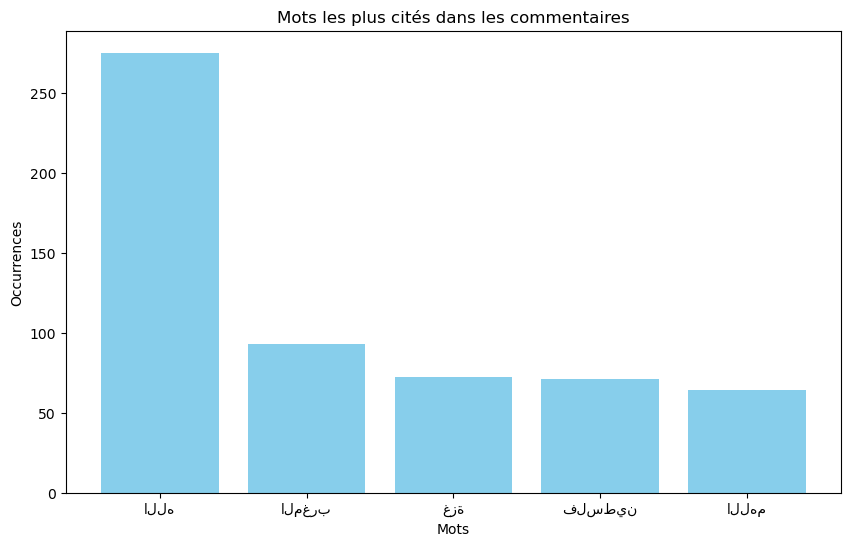

In [41]:
import matplotlib.pyplot as plt
# Tracer un diagramme à barres pour les 10 mots les plus cités
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words), color='skyblue')
plt.title('Mots les plus cités dans les commentaires')
plt.xlabel('Mots')
plt.ylabel('Occurrences')
plt.show()